In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data collection

In [3]:
df = pd.read_csv(r"D:\AI\Projects\Titanic\train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Pre-processing

Data cleaning--->EDA--->Feature engineering

## 1. Data cleaning

### Handling duplicate data

In [6]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [7]:
# as we can see no duplicate values but if we have any we will remove it by drop_duplicate function

df.duplicated(keep = False).sum()        

0

### Handling irrelevant data

In [8]:
# In this we will remove features which seems not important for our model usually done with the help pf domain experts.
# It seems like 'Name' and 'Ticket' seems to be irrelevant.

df = df.drop(["Name" , "Ticket"] , axis = 1)

In [9]:
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C


### Handling structural error 

In [10]:
# to check for any datatype error or syntax error or typo errors

### Handling null data

In [11]:
null_values = (df.isnull().sum()/df.isnull().count())*float(100)
null_values

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [12]:
# As we can see that there are lots of null values in cabin so will remove that column

df = df.drop(["Cabin"] , axis = 1)

In [13]:
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C


In [14]:
df["Age"].describe()  # seems like its better to fill with mean value

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [16]:
df["Age"].isnull().sum()   # done

0

### Handling outliers

#### Box plots

'outliers are clearly visible'

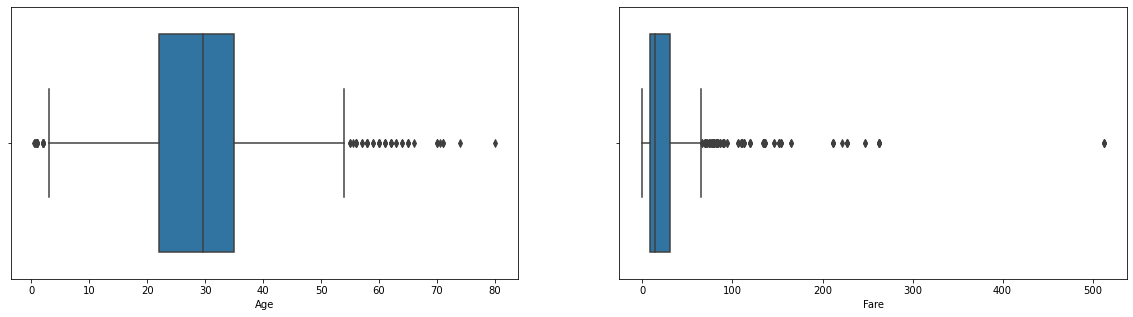

In [17]:

fig,ax = plt.subplots(nrows=1 , ncols=2 , figsize = (20,5))
sns.boxplot(df.Age , ax = ax[0])
sns.boxplot(df.Fare , ax = ax[1])

'''outliers are clearly visible'''

#### Scatter plot

'outliers are clearly visible'

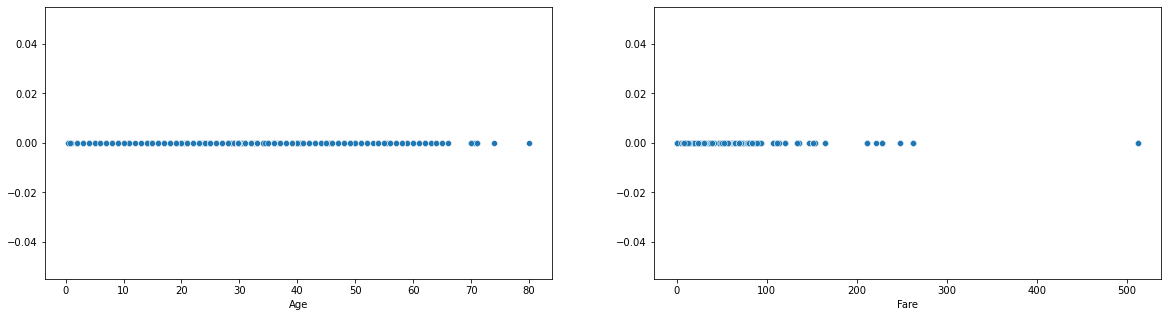

In [18]:
fig,ax = plt.subplots(nrows=1 , ncols=2 , figsize = (20,5))
sns.scatterplot(x = df["Age"] , y = np.zeros_like(df.Age) , ax = ax[0])
sns.scatterplot(x = df["Fare"] , y = np.zeros_like(df.Fare) , ax = ax[1])

'''outliers are clearly visible'''

#### Distribution plot

<AxesSubplot:xlabel='Fare', ylabel='Density'>

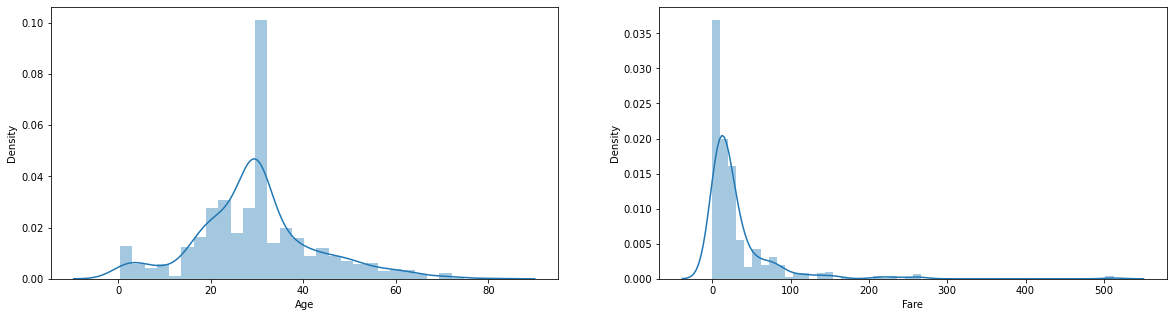

In [19]:
fig,ax = plt.subplots(nrows=1 , ncols=2 , figsize = (20,5))
sns.distplot(df.Age , ax = ax[0])    # seems like gaussian
sns.distplot(df.Fare , ax = ax[1])   # positively skewed

#### IQR(Inter Quartile Range)

In [20]:
# Basically,we will find here IQR then we will find upper limit and lower limit by formulae:-
# IQR = Q3-Q1 ,lower limit = Q1-1.5IQR and upper limit = Q3+1.5IQR and then point below lower limit and above upper limit 
# will become our outliers.Then we will assign null values to outliers and later will remove it.

# lets do first for 'age' column

Q1_Age = np.quantile(df.Age,0.25)   # 25th percentile
Q3_Age = np.quantile(df.Age,0.75)   # 75th percentile
IQR_Age = Q3_Age - Q1_Age
Upper_limit_Age = Q1_Age + 1.5*IQR_Age
Lower_limit_Age = Q3_Age - 1.5*IQR_Age
print("upper_limit of age feature",Upper_limit_Age)
print("lower_limit of age feature",Lower_limit_Age)

# finding outliers

outliers_Age = []
for i in df['Age']:
    if i > Upper_limit_Age or i < Lower_limit_Age:
        outliers_Age.append(i)
        
        
print("total outliers in age",len(outliers_Age))        
        
#print("outlier values in Age column",outliers_Age)        



upper_limit of age feature 41.5
lower_limit of age feature 15.5
total outliers in age 225


In [21]:
# lets do for 'fare' column

Q1_Fare = np.quantile(df.Fare,0.25)   # 25th percentile
Q3_Fare = np.quantile(df.Fare,0.75)   # 75th percentile
IQR_Fare = Q3_Fare - Q1_Fare
Upper_limit_Fare = Q1_Fare + 1.5*IQR_Fare
Lower_limit_Fare = Q3_Fare - 1.5*IQR_Fare
print("upper_limit of fare feature",Upper_limit_Fare)
print("lower_limit of fare feature",Lower_limit_Fare)

# finding outliers

outliers_Fare = []
for i in df['Fare']:
    if i > Upper_limit_Fare or i < Lower_limit_Fare:
        outliers_Fare.append(i)
        
print("total outliers in fare",len(outliers_Fare))        
#print("outlier values in Fare column",outliers_Fare)        


upper_limit of fare feature 42.5448
lower_limit of fare feature -3.6343999999999994
total outliers in fare 171


IQR is more aggresive towards outliers and sometimes it treats normal point as outlier so its better to change the value
in formula from 1.5 to 3 so we get updated output as :

In [22]:
# lets do first for 'age' column

Q1_Age = np.quantile(df.Age,0.25)   # 25th percentile
Q3_Age = np.quantile(df.Age,0.75)   # 75th percentile
IQR_Age = Q3_Age - Q1_Age
Upper_limit_Age = Q1_Age + 3*IQR_Age
Lower_limit_Age = Q3_Age - 3*IQR_Age
print("upper_limit of age feature",Upper_limit_Age)
print("lower_limit of age feature",Lower_limit_Age)

# finding outliers

outliers_Age = []
for i in df['Age']:
    if i > Upper_limit_Age or i < Lower_limit_Age:
        outliers_Age.append(i)

print("total outliers in age",len(outliers_Age))                

# lets do for 'fare' column

Q1_Fare = np.quantile(df.Fare,0.25)   # 25th percentile
Q3_Fare = np.quantile(df.Fare,0.75)   # 75th percentile
IQR_Fare = Q3_Fare - Q1_Fare
Upper_limit_Fare = Q1_Fare + 3*IQR_Fare
Lower_limit_Fare = Q3_Fare - 3*IQR_Fare
print("upper_limit of fare feature",Upper_limit_Fare)
print("lower_limit of fare feature",Lower_limit_Fare)

# finding outliers

outliers_Fare = []
for i in df['Fare']:
    if i > Upper_limit_Fare or i < Lower_limit_Fare:
        outliers_Fare.append(i)

print("total outliers in fare",len(outliers_Fare))        


upper_limit of age feature 61.0
lower_limit of age feature -4.0
total outliers in age 19
upper_limit of fare feature 77.1792
lower_limit of fare feature -38.2688
total outliers in fare 92


In [23]:
# assigning null values to outliers

df["Age"].values[df["Age"] > Upper_limit_Age] = np.nan
df["Age"].values[df["Age"] < Lower_limit_Age] = np.nan
df["Fare"].values[df["Fare"] > Upper_limit_Fare] = np.nan
df["Fare"].values[df["Fare"] < Lower_limit_Fare] = np.nan

In [24]:
# filling null values

df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())

#### Standard Derivation

In [25]:
#lets do this for 'Age' column

df_sd = pd.read_csv(r"D:\AI\Projects\Titanic\train.csv")

In [26]:
df_sd.Age.isnull().sum()

177

In [27]:
df_sd["Age"] = df_sd["Age"].fillna(df_sd["Age"].mean())

In [28]:
df_sd.Age.isnull().sum()

0

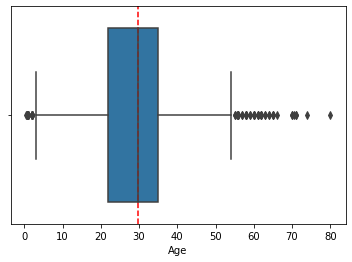

In [29]:
sns.boxplot(df_sd["Age"]).axvline((df_sd["Age"].mean()) , color = 'r' , linestyle = '--')

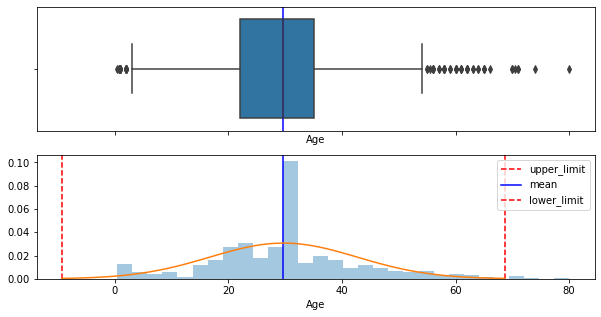

In [30]:
# lets start process

from scipy.stats import norm

mean = df_sd["Age"].mean()
sd = df_sd["Age"].std()
upper_limit = mean+3*sd
lower_limit = mean-3*sd

# plotting
fig,(ax_box,ax_dist) = plt.subplots(nrows = 2,sharex = True ,figsize = (10,5))
sns.boxplot(df_sd.Age ,ax = ax_box)
ax_box.axvline(mean,color = 'b')

sns.distplot(df_sd.Age ,ax = ax_dist , kde = False , norm_hist = True)
ax_dist.axvline(lower_limit , color = 'r' , linestyle = '--')
ax_dist.axvline(mean , color = 'b')
ax_dist.axvline(upper_limit , color = 'r' , linestyle = '--')

x = np.linspace(lower_limit,upper_limit,100)
plt.plot(x , norm.pdf(x,mean,sd))

plt.legend({"upper_limit" : upper_limit,  "mean": mean , "lower_limit": lower_limit })

# outliers are clearly visible if we compare box plot with dist. plot

In [31]:
total_outliers = []

for i in df_sd["Age"]:
    if i>upper_limit or i<lower_limit:
        total_outliers.append(i)

In [32]:
len(total_outliers)

7

In [33]:
# again will do same thing and assign null values to outliers and then fill it with means .

df_sd["Age"].values[df_sd["Age"] > upper_limit] = np.nan
df_sd["Age"].values[df_sd["Age"] < lower_limit] = np.nan

In [34]:
df_sd["Age"].isnull().sum()   # outliers converted to null values rest process is same

7

#### Z-score

In [35]:
df_z = pd.read_csv(r"D:\AI\Projects\Titanic\train.csv")

In [36]:
df_z.Age.isnull().sum()

177

In [37]:
df_z["Age"] = df_z["Age"].fillna(df_z["Age"].mean())

In [38]:
df_z.Age.isnull().sum()

0

In [39]:
# lets start the process

mean = df_z["Age"].mean()
sd = df_z["Age"].std()
first_upper_limit = mean + sd           # 68% of point
first_lower_limit = mean - sd           # 68% of point
second_upper_limit = mean + 2*sd        # 95% of point
second_lower_limit = mean - 2*sd        # 95% of point
third_upper_limit = mean + 3*sd         # 99.7% of point
third_lower_limit = mean - 3*sd         # 99.7% of point
mean

29.699117647058763

In [40]:
df_z["Zscore"] = (df_z["Age"] - mean)/sd

In [41]:
df_z.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Zscore
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,-5.921480e-01
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,6.384304e-01
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,-2.845034e-01
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,4.076970e-01
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,4.076970e-01
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,4.371893e-15
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,1.869009e+00
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,-2.130371e+00
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,-2.075923e-01
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,-1.207437e+00


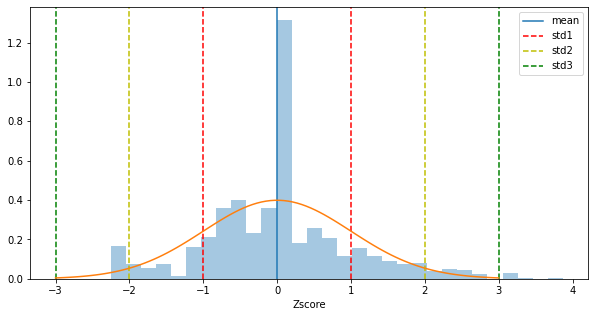

In [42]:
# plotting for z score

fig,ax_dist = plt.subplots(figsize = (10,5))

sns.distplot(df_z["Zscore"], ax = ax_dist , kde = False , norm_hist=True)
ax_dist.axvline(x = 0)    # mean
ax_dist.axvline(x = 1 , color = 'r' , linestyle = '--')
ax_dist.axvline(x = 2 , color = 'y' , linestyle = '--')
ax_dist.axvline(x = 3 , color = 'g' , linestyle = '--')
ax_dist.axvline(x = -1 , color = 'r' , linestyle = '--')
ax_dist.axvline(x = -2 , color = 'y' , linestyle = '--')
ax_dist.axvline(x = -3 , color = 'g' , linestyle = '--')

x = np.linspace(-3,3,100)
plt.plot(x,norm.pdf(x , 0 , 1))
plt.legend({'mean':0 , 'std1':1 , 'std2':2 , 'std3':3})
plt.show()

# Any z-score greater than 3 or less than -3 is considered to be an outlier

In [43]:
# now we will simply filter out z score points having more than 3 or less than -3 value and will consider it as our outlier

df_z["Zscore"].values[df_z["Zscore"]>3] = np.nan
df_z["Zscore"].values[df_z["Zscore"]<-3] = np.nan

In [44]:
df_z["Zscore"].isnull().sum()       # outliers converted to null values rest process is same

7

## 2. EDA(Exploratory Data Analysis)

In [45]:
# EDA consists of analysing each features carefully .
# 1.univariate analysis
# 2.bivariate analysis
# 3.multivariate analysis

In [46]:
df_eda = pd.read_csv(r"D:\AI\Projects\Titanic\train.csv")

In [47]:
df_eda.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [48]:
# target_feature or y = 'Survived'

### a) Univariate analysis

In [49]:
df.describe()   # showing only numerical features

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.890383,0.523008,0.381594,19.440905
std,257.353842,0.486592,0.836071,11.768765,1.102743,0.806057,15.380347
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,34.000000,1.000000,0.000000,26.000000
max,891.000000,1.000000,3.000000,61.000000,8.000000,6.000000,76.729200


<AxesSubplot:xlabel='Survived', ylabel='count'>

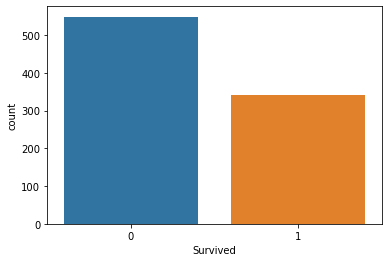

In [50]:
sns.countplot(df.Survived)

In [ ]:
Do all bivariate and multivariate ,finally use correlation and find appropriate features and build model.